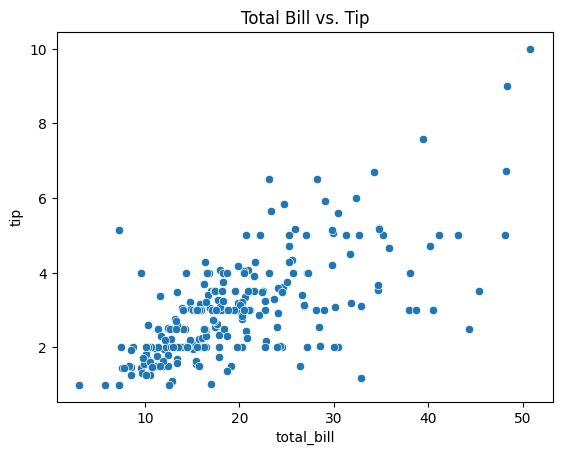

Linear Regression MSE: 0.5688142529229536
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 25.2048
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4763  
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9572
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6762  
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0312  
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7175
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1489  
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2026
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4369  
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2939
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Neural Network MSE: 0.7032182277385455
XGBoost MSE: 1.188865806841303
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors i

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import xgboost as xgb

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create a scatter plot of total_bill vs. tip
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Total Bill vs. Tip")
plt.show()

# Prepare data for modeling
X = tips[["total_bill"]]
y = tips["tip"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

# Neural Network
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_nn.compile(loss='mean_squared_error', optimizer='adam')
model_nn.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred_nn = model_nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network MSE:", mse_nn)


# XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost MSE:", mse_xgb)

import gradio as gr

def greet(name):
  return f"Hello, {name}!"

iface = gr.Interface(
    fn=greet,
    inputs="text",
    outputs="text"
)

iface.launch()